# NFL Betting Odds

**Author:** Jakob Malasig
**Last modified:** 12-17-2024 (created: 12-17-2024)

**Description:** I will be analyzing the dataset.

Import libraries:

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Import data:

In [6]:
# load data into dataframe
nfl_data = pd.read_csv("../../data/final/nfl_data_for_analysis.csv", encoding = "UTF-8")

In [7]:
display(nfl_data)

,date,schedule_season,home_team,score_home,away_team,score_away,team_favorite,spread_favorite,over_under_line,location,weather_temperature,weather_humidity,weather_detail,result
0,09/06/2018,2018,Philadelphia Eagles,18,Atlanta Falcons,12,Philadelphia Eagles,1.0,44.5,Lincoln Financial Field,81.0,NaN,rain,18 - 12
1,09/09/2018,2018,Baltimore Ravens,47,Buffalo Bills,3,Baltimore Ravens,7.5,39.0,M&T Bank Stadium,61.0,NaN,rain,47 - 3
2,09/09/2018,2018,Carolina Panthers,16,Dallas Cowboys,8,Carolina Panthers,2.5,42.5,Bank of America Stadium,81.0,NaN,rain,16 - 8
3,09/09/2018,2018,Cleveland Browns,21,Pittsburgh Steelers,21,Pittsburgh Steelers,3.5,41.0,FirstEnergy Stadium,58.0,NaN,rain,21 - 21
4,09/09/2018,2018,Denver Broncos,27,Seattle Seahawks,24,Denver Broncos,3.0,42.5,Sports Authority Field at Mile High,84.0,NaN,NaN,27 - 24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1382,12/01/2024,2024,Cincinnati Bengals,38,Pittsburgh Steelers,44,Cincinnati Bengals,3.0,46.0,Paycor Stadium,NaN,NaN,NaN,38 - 44
1383,12/01/2024,2024,Minnesota Vikings,23,Arizona Cardinals,22,Minnesota Vikings,3.5,45.0,U.S. Bank Stadium,72.0,NaN,indoor,23 - 22
1384,12/01/2024,2024,New England Patriots,24,Indianapolis Colts,25,Indianapolis Colts,2.5,41.5,Gillette Stadium,NaN,NaN,NaN,24 - 25
1385,12/01/2024,2024,New Orleans Saints,14,Los Angeles Rams,21,St. Louis Rams,2.5,49.0,Caesars Superdome,72.0,NaN,indoor,14 - 21


Adding spread result and over/under result columns:

In [48]:
# Define spread_result as binary
def calculate_spread_result(row):
    # if the home team is the favorite
    if row['team_favorite'] == row['home_team']:
        # checks to see if the actual spread of game beat the betting line spread
        if (row['score_home'] - row['score_away']) > row['spread_favorite']:
            return 1
        else:
            return 0
    # if the away team is the favorite
    elif row['team_favorite'] == row['away_team']:
        if (row['score_away'] - row['score_home']) > -row['spread_favorite']:
            return 1
        else:
            return 0
    # no favorite, no bet
    else:
        return 0 

# Define over_under_result as binary
def calculate_over_under_result(row):
    # calculate total points in the game
    total_points = row['score_home'] + row['score_away']
    # total points were more than the over/under line
    if total_points > row['over_under_line']:
        return 1
    else:
        return 0

In [9]:
# Apply the calculations to the dataframe
nfl_data['spread_result'] = nfl_data.apply(calculate_spread_result_binary, axis=1)
nfl_data['over_under_result'] = nfl_data.apply(calculate_over_under_result_binary, axis=1)

display(nfl_data)

,date,schedule_season,home_team,score_home,away_team,score_away,team_favorite,spread_favorite,over_under_line,location,weather_temperature,weather_humidity,weather_detail,result,spread_result,over_under_result
0,09/06/2018,2018,Philadelphia Eagles,18,Atlanta Falcons,12,Philadelphia Eagles,1.0,44.5,Lincoln Financial Field,81.0,NaN,rain,18 - 12,1,0
1,09/09/2018,2018,Baltimore Ravens,47,Buffalo Bills,3,Baltimore Ravens,7.5,39.0,M&T Bank Stadium,61.0,NaN,rain,47 - 3,1,1
2,09/09/2018,2018,Carolina Panthers,16,Dallas Cowboys,8,Carolina Panthers,2.5,42.5,Bank of America Stadium,81.0,NaN,rain,16 - 8,1,0
3,09/09/2018,2018,Cleveland Browns,21,Pittsburgh Steelers,21,Pittsburgh Steelers,3.5,41.0,FirstEnergy Stadium,58.0,NaN,rain,21 - 21,1,1
4,09/09/2018,2018,Denver Broncos,27,Seattle Seahawks,24,Denver Broncos,3.0,42.5,Sports Authority Field at Mile High,84.0,NaN,NaN,27 - 24,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1382,12/01/2024,2024,Cincinnati Bengals,38,Pittsburgh Steelers,44,Cincinnati Bengals,3.0,46.0,Paycor Stadium,NaN,NaN,NaN,38 - 44,0,1
1383,12/01/2024,2024,Minnesota Vikings,23,Arizona Cardinals,22,Minnesota Vikings,3.5,45.0,U.S. Bank Stadium,72.0,NaN,indoor,23 - 22,0,0
1384,12/01/2024,2024,New England Patriots,24,Indianapolis Colts,25,Indianapolis Colts,2.5,41.5,Gillette Stadium,NaN,NaN,NaN,24 - 25,1,1
1385,12/01/2024,2024,New Orleans Saints,14,Los Angeles Rams,21,St. Louis Rams,2.5,49.0,Caesars Superdome,72.0,NaN,indoor,14 - 21,0,0


<br>

Analysis 1: Spread and Over/Under Winning Percentages

In [26]:
# spread winning percentage
spread_win_percentage = nfl_data["spread_result"].mean() * 100

# over/under winning percentage
over_under_win_percentage = nfl_data["over_under_result"].mean() * 100

print(f"Spread Winning Percentage: {spread_win_percentage:.2f}%")
print(f"Over/Under Winning Percentage: {over_under_win_percentage:.2f}%")

Spread Winning Percentage: 50.40%
Over/Under Winning Percentage: 48.45%


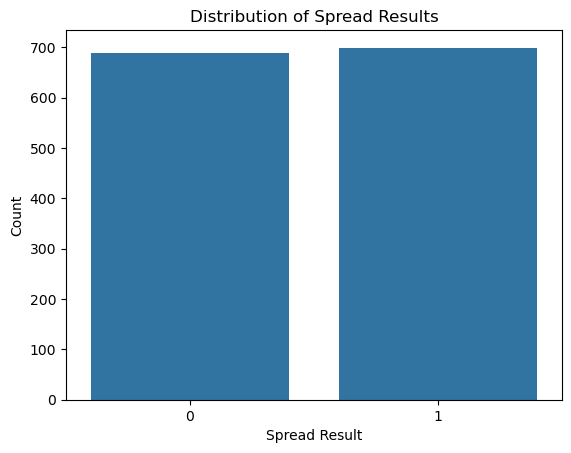

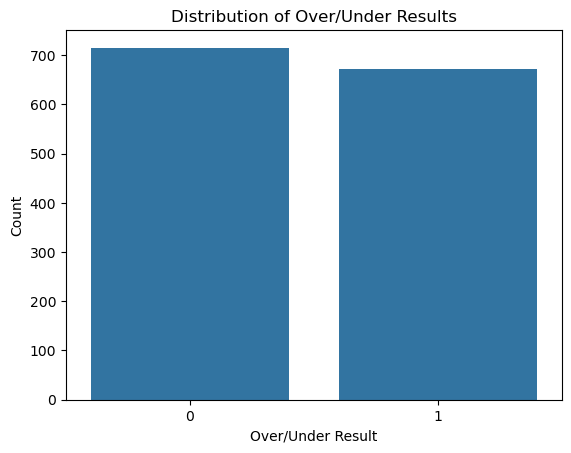

In [61]:
# Distribution of Spread Results
spread_counts = nfl_data['spread_result'].value_counts()
sns.barplot(x=spread_counts.index, y=spread_counts.values)
plt.title("Distribution of Spread Results")
plt.ylabel("Count")
plt.xlabel("Spread Result")
plt.show()

# Distribution of Over/Under Results
over_under_counts = nfl_data['over_under_result'].value_counts()
sns.barplot(x=over_under_counts.index, y=over_under_counts.values)
plt.title("Distribution of Over/Under Results")
plt.ylabel("Count")
plt.xlabel("Over/Under Result")
plt.show()

<br>

Analysis 2: Betting Trends in NFL Seasons

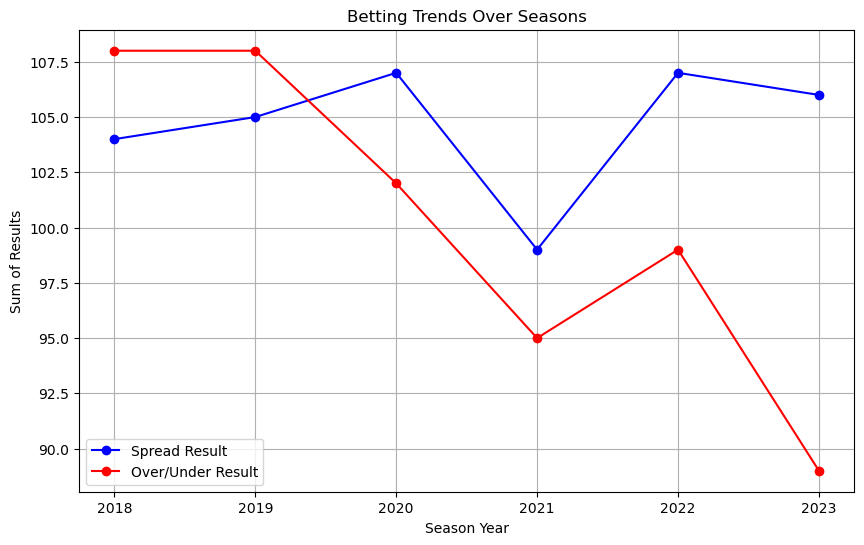

In [57]:
# Groupby the season and calculate the sum for both 'spread_result' and 'over_under_result'
nfl_data_no2024 = nfl_data[nfl_data["schedule_season"] != 2024]
season_summary = nfl_data_no2024.groupby("schedule_season")[["spread_result", "over_under_result"]].sum()

# plotting the trends over seasons
plt.figure(figsize=(10, 6))
plt.plot(season_summary.index, season_summary['spread_result'], label='Spread Result', marker='o', linestyle='-', color='b')
plt.plot(season_summary.index, season_summary['over_under_result'], label='Over/Under Result', marker='o', linestyle='-', color='r')

# adding labels and title
plt.title('Betting Trends Over Seasons')
plt.xlabel('Season Year')
plt.ylabel('Sum of Results')
plt.legend()

plt.grid(True)
plt.show()

<br>

Analysis 3: Certain Teams and Betting Lines

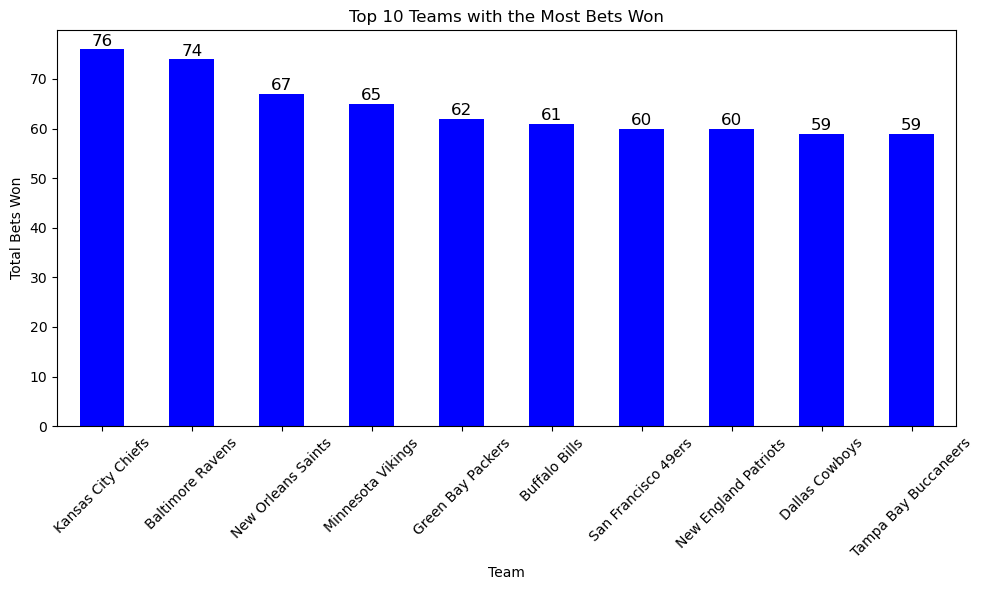

In [53]:
# group by the team favorite and calculate the sum of the 'spread_result' and 'over_under_result'
team_wins = nfl_data.groupby('team_favorite')[['spread_result', 'over_under_result']].sum()

# calculate the total number of wins for each team
team_wins['total_wins'] = team_wins['spread_result'] + team_wins['over_under_result']

# sort the teams by total wins, descending
top_teams = team_wins.sort_values('total_wins', ascending=False).head(10)

# plotting the bar plot
plt.figure(figsize=(10, 6))
ax = top_teams['total_wins'].plot(kind='bar', color='blue')

# add the values on top of each bar
for i, value in enumerate(top_teams['total_wins']):
    ax.text(i, value + 0.1, str(value), ha='center', va='bottom', fontsize=12)

# adding labels and title
plt.title('Top 10 Teams with the Most Bets Won')
plt.xlabel('Team')
plt.ylabel('Total Bets Won')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

<br>